# fuzzy siram pada rumah kaca

paper : https://www.mendeley.com/catalogue/61f2606a-56a6-36e2-a397-d86aad6d4bd4/

**Winarto Saputro 19/448737/PPA/05820**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
class Fuzzy():
    def __init__(self, suhu, lembap, aturan):
        self.suhu = suhu
        self.lembap = lembap
        self.aturan = aturan
    
    # fuzzifikasi suhu
    def suhu_dingin(self):
        if self.suhu >= 22.5:
            return 0.0
        elif self.suhu > 10 and self.suhu < 22.5:
            return (22.5-self.suhu)/(22.5-10)
        elif self.suhu <= 10:
            return 1.0
    
    def suhu_sedang(self):
        if self.suhu <= 10 or self.suhu >=35:
            return 0.0
        elif self.suhu > 10 and self.suhu < 22.5:
            return (self.suhu-10)/(22.5-10)
        elif self.suhu >= 22.5 and self.suhu < 35:
            return (35-self.suhu)/(35-22.5)
        
    def suhu_panas(self):
        if self.suhu  <= 22.5:
            return 0.0
        elif self.suhu > 22.5 and self.suhu < 35:
            return (self.suhu-22.5)/(35-22.5)
        elif self.suhu >= 35:
            return 1.0
    
    def myu_suhu(self):
        return [self.suhu_dingin(), self.suhu_sedang(), self.suhu_panas()]
    
    # fuzzifikasi lembap
    def kering(self):
        if self.lembap >= 50:
            return 0.0
        elif self.lembap >= 0 and self.lembap < 50:
            return (50-self.lembap)/50
        
    def sedang(self):
        if self.lembap > 0 and self.lembap < 50:
            return self.lembap/50
        elif self.lembap >= 50 and self.lembap < 100:
            return (100-self.lembap)/50
        
    def basah(self):
        if self.lembap <= 50:
            return 0.0
        elif self.lembap > 50 and self.lembap <= 100:
            return (self.lembap-50)/50
        
    def myu_lembap(self):
        return [self.kering(), self.sedang(), self.basah()]
    
    # operator 
    def s_norm(a,b):
        return max(a,b)
    
    def s_alg_sum(a,b):
        return (a+b)-(a*b)
    
    def t_norm(a,b):
        return min(a,b)
    
    def t_alg_product(a,b):
        return a*b
    
    def c_std(x):
        return 1-x
    
    def very(x):
        return x**2
    
    def rather(x):
        return  x**(0.5)
    
    # ploting
    def x_dingin(self,x):
        if x >= 22.5:
            return 0.0
        elif x > 10 and x < 22.5:
            return (22.5-x)/(22.5-10)
        elif x <= 10:
            return 1.0
    
    def x_sedang(self,x):
        if x<= 10 or x>=35:
            return 0.0
        elif x> 10 and x< 22.5:
            return (x-10)/(22.5-10)
        elif x>= 22.5 and x< 35:
            return (35-x)/(35-22.5)
        
    def x_panas(self,x):
        if x <= 22.5:
            return 0.0
        elif x > 22.5 and x < 35:
            return (x-22.5)/(35-22.5)
        elif x >= 35:
            return 1.0
    
    def x_kering(self, x):
        if x>= 50:
            return 0.0
        elif x>= 0 and x< 50:
            return (50-x)/50
        
    def x_lsedang(self, x):
        if x> 0 and x< 50:
            return x/50
        elif x>= 50 and x< 100:
            return (100-x)/50
        
    def x_basah(self, x):
        if x<= 50:
            return 0.0
        elif x> 50 and x<= 100:
            return (x-50)/50
                    
    def plot_fuzzy(self):
        fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 8))
        
        x_suhu = np.arange(10,35,0.5)
        x_lembab = np.arange(0,100,1)
        
        arr_dingin = [self.x_dingin(i) for i in x_suhu]
        arr_sedang = [self.x_sedang(i) for i in x_suhu]
        arr_panas = [self.x_panas(i) for i in x_suhu]
        
        ax0.plot(x_suhu, np.array(arr_dingin), 'r', linewidth=1.5, label='Dingin')
        ax0.plot(x_suhu, np.array(arr_sedang), 'g', linewidth=1.5, label='Sedang')
        ax0.plot(x_suhu, np.array(arr_panas), 'b', linewidth=1.5, label='Panas')
        ax0.set_title('Suhu')
        ax0.legend()
                    
        arr_kering = [self.x_kering(i) for i in x_lembab]
        arr_lsedang = [self.x_lsedang(i) for i in x_lembab]
        arr_basah = [self.x_basah(i) for i in x_lembab]      
                    
        ax1.plot(x_lembab, np.array(arr_kering), 'r', linewidth=1.5, label='Kering')
        ax1.plot(x_lembab, np.array(arr_lsedang), 'g', linewidth=1.5, label='Sedang')
        ax1.plot(x_lembab, np.array(arr_basah), 'b', linewidth=1.5, label='Basah')
        ax1.set_title('Kelembapan')
        ax1.legend()

        plt.tight_layout()
    
    # inference rule
    def inference(self, operator=t_norm):
        suhu = self.myu_suhu()
        lembap = self.myu_lembap()
        for l in lembap:
            for s in suhu:
                print(operator(l,s),end='\t')
            print('')
    
    # defuzifikasi
    def defuzifikasi(self, operator=t_norm):
        # weight average
        fz_suhu = self.myu_suhu()
        fz_lembap = self.myu_lembap()

        pembilang = []
        penyebut = []

        for i in range(len(fz_suhu)):
            for j in range(len(fz_lembap)):
                rule = operator(fz_suhu[i], fz_lembap[j])
                bobot = rule * self.aturan[j][i]
                penyebut.append(rule)
                pembilang.append(bobot)

        return sum(pembilang)/sum(penyebut)
    
    # let's go
    def run(self, operator=t_norm):
        print('hasil fuzifikasi : ')
        print('suhu \t\t', self.myu_suhu())
        print('kelembapan \t',self.myu_lembap())
        
        print('')
        print('hasil inferensi rule')
        self.inference(operator)
        
        print('')
        print('hasil defuzifikasi')
        print(self.defuzifikasi(operator))

In [32]:
#rule
SB = 1 #siram banyak
SS = 0.5 #siram sedang
TS = 0.1 #tidak siram

aturan = [
    [SB,SB,SB],
    [TS,SS,SS],
    [TS,TS,SS]
]

f = Fuzzy(28,11,aturan)

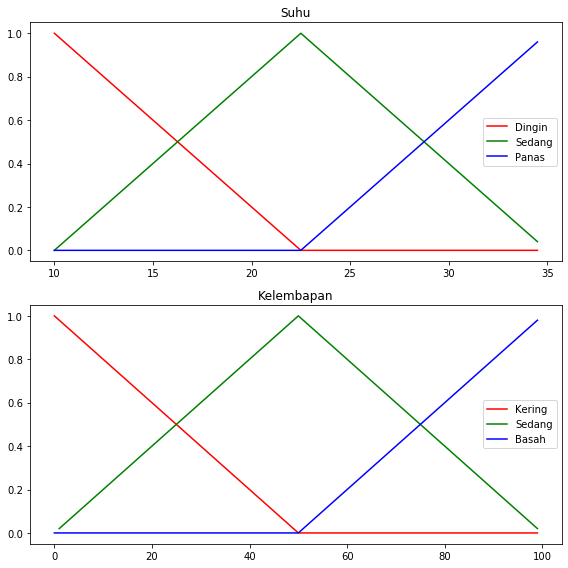

In [33]:
f.plot_fuzzy()

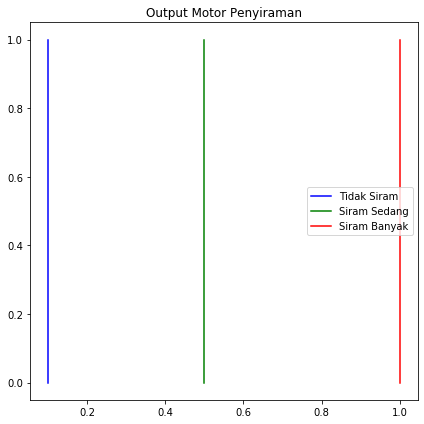

In [34]:
def plot_motor():
    fig, ax3 = plt.subplots(nrows=1, figsize=(6, 6))

    ax3.plot([TS, TS], [0, 1], 'b', linewidth=1.5, label='Tidak Siram')
    ax3.plot([SS, SS], [0, 1], 'g', linewidth=1.5, label='Siram Sedang')
    ax3.plot([SB, SB], [0, 1], 'r', linewidth=1.5, label='Siram Banyak')

    ax3.set_title('Output Motor Penyiraman')
    ax3.legend()

    plt.tight_layout()
    
plot_motor()

![Image of Yaktocat](image/aturan-siram.png)

In [35]:
f.run()

hasil fuzifikasi : 
suhu 		 [0.0, 0.56, 0.44]
kelembapan 	 [0.78, 0.22, 0.0]

hasil inferensi rule
0.0	0.56	0.44	
0.0	0.22	0.22	
0.0	0.0	0.0	

hasil defuzifikasi
0.8472222222222224
